In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [71]:
 #loading the data from csv file to a Pandas DataFrame
df = pd.read_csv('Mall_Customers.csv')

In [72]:
# first 5 rows in the dataframe
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [73]:
# finding the number of rows and columns
df.shape

(200, 5)

In [81]:
# getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Gender_label            200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [82]:
# checking for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender_label              0
dtype: int64

Choosing the Annual Income Column & Spending Score column



In [83]:
X = df.iloc[:,[3,4]].values

In [84]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [85]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

C:\Users\aswin adhithya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aswin adhithya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aswin adhithya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aswin adhithya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

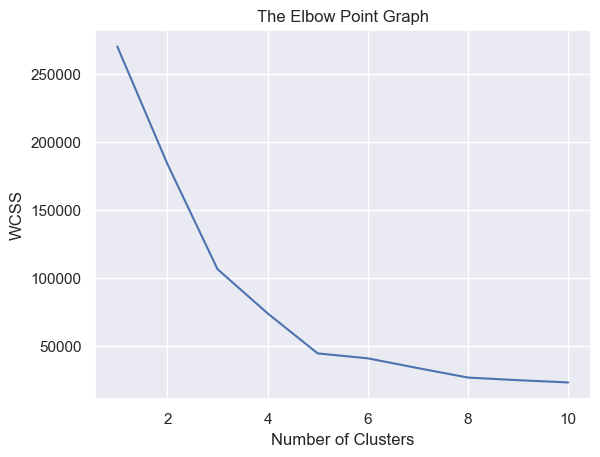

In [86]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# The WCSS gradually decreases as the number of clusters increases.
# The sharp bend or "elbow" suggests the optimal cluster count.
# In this graph, the elbow appears around 5 clusters, where the rate of decrease slows.

Optimum Number of Clusters = 5

Training the k-Means Clustering Model



In [87]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


C:\Users\aswin adhithya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


5 Clusters - 0, 1, 2, 3, 4

Visualizing all the Clusters

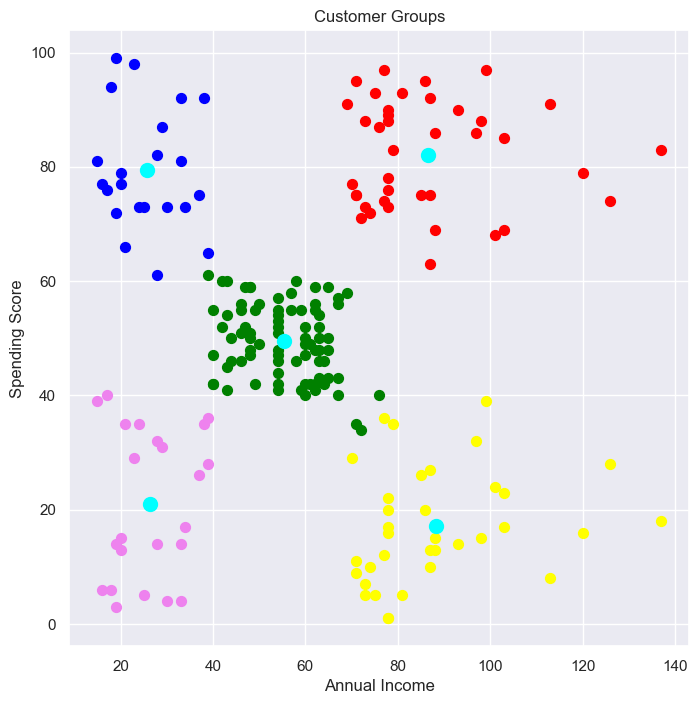

In [88]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

C:\Users\aswin adhithya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aswin adhithya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aswin adhithya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aswin adhithya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

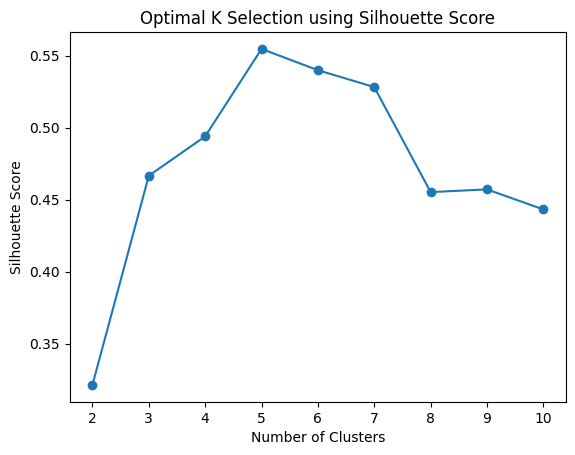

Optimal number of clusters: 5
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


C:\Users\aswin adhithya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using silhouette scores
sil_scores = []
cluster_range = range(2, 11)  # Testing clusters from 2 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

# Plot silhouette scores
plt.plot(cluster_range, sil_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Optimal K Selection using Silhouette Score")
plt.show()

# Choose best K based on highest silhouette score
optimal_k = cluster_range[np.argmax(sil_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Apply K-Means with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display first few rows with cluster assignments
print(df.head())

Observations:-
1) Cluster Separation – The K-Means algorithm has successfully identified clear-cut customer segments. The separation between clusters suggests that spending habits and income levels significantly impact customer grouping.
2) Centroids Indicate Core Groups – Each cluster center represents the typical customer profile within that segment, helping to understand the  behavioral patterns.
3) Business Strategy Insights – This visualization is valuable for targeted marketing:
# High-Income, High-Spending Customers – Ideal for premium marketing strategies.
# Low-Income, Low-Spending Customers – More likely to respond to budget-friendly offers.
# Middle-Income Consumers – A diverse group where tailored engagement could work.



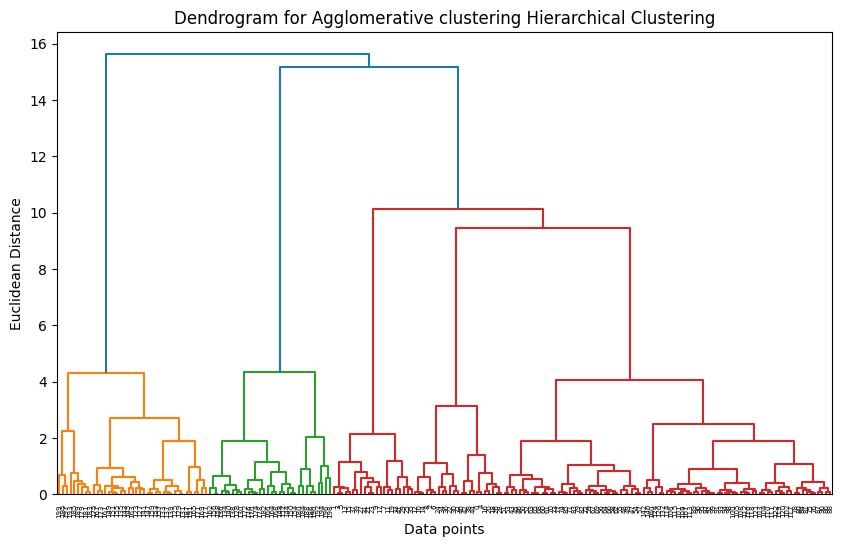

Silhouette Score: 0.5538


In [11]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Selecting relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Generate the hierarchical linkage matrix
linkage_matrix = sch.linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(linkage_matrix)
plt.xlabel('Data points')
plt.ylabel('Euclidean Distance')
plt.title('Dendrogram for Agglomerative clustering Hierarchical Clustering')
plt.show()

# Apply Agglomerative Clustering as an approximation for divisive clustering
num_clusters = 5  # Adjust based on dendrogram visualization
cluster_model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
labels = cluster_model.fit_predict(X_scaled)

# Compute silhouette score
if len(set(labels)) > 1:
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {score:.4f}")
else:
    print("Silhouette Score could not be calculated due to insufficient clusters.")

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram



In [14]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [15]:
# Perform divisive clustering using linkage
linkage_matrix = linkage(X, method='ward')



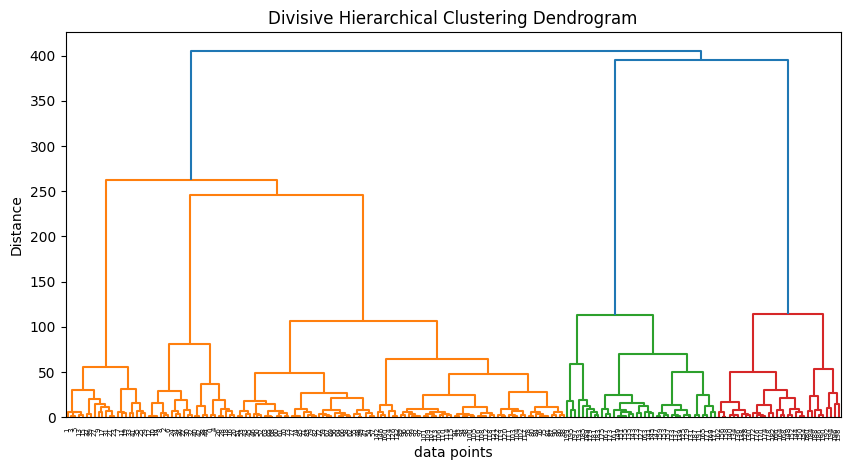

In [16]:
# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.xlabel("data points")
plt.ylabel("Distance")
plt.title("Divisive Hierarchical Clustering Dendrogram")
plt.show()


Distribution based clustring

C:\Users\aswin adhithya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'GaussianMixture(standardized)')

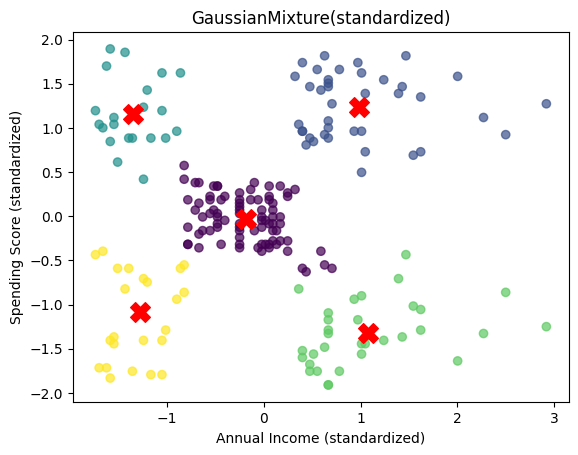

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


#  dataset
df = pd.read_csv("Mall_Customers.csv")

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=42)
labels = gmm.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = labels

# Visualizing clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], color='red', marker='X', s=200, label='Centers')
plt.xlabel('Annual Income (standardized)')
plt.ylabel('Spending Score (standardized)')
plt.title('GaussianMixture(standardized)')


In [1]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load dataset (Ensure you replace 'your_dataset.csv' with your actual file)
df = pd.read_csv("Mall_Customers.csv")

# Drop non-numeric columns if needed (e.g., 'Gender')
df.drop(columns=['Gender'], inplace=True)

# Convert DataFrame to NumPy array
X = df.values

# Standardize the dataset (optional but recommended for better clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Gaussian Mixture Model
num_clusters = 5  # Adjust based on your dataset
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Compute silhouette score
silhouette_gmm = silhouette_score(X_scaled, gmm_labels)
print("Silhouette Score for GMM:", silhouette_gmm)

Silhouette Score for GMM: 0.3647102145704439


C:\Users\aswin adhithya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\aswin adhithya\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\aswin adhithya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


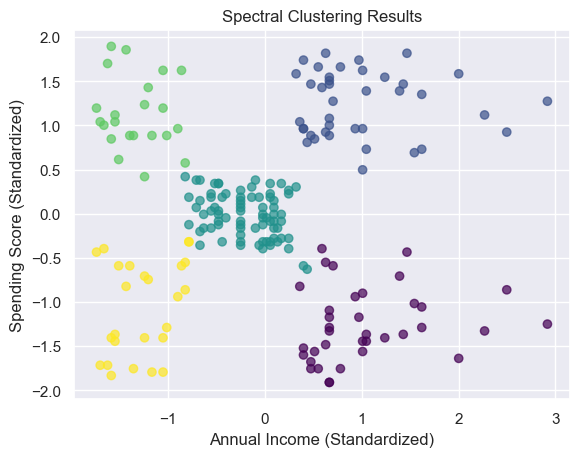

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
labels = spectral.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = labels

# Visualizing clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.title('Spectral Clustering Results')
plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Spectral Clustering with an assumed number of clusters (e.g., 5)
spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
labels = spectral.fit_predict(X_scaled)

# Compute silhouette score
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.5447270314378762


C:\Users\aswin adhithya\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\aswin adhithya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


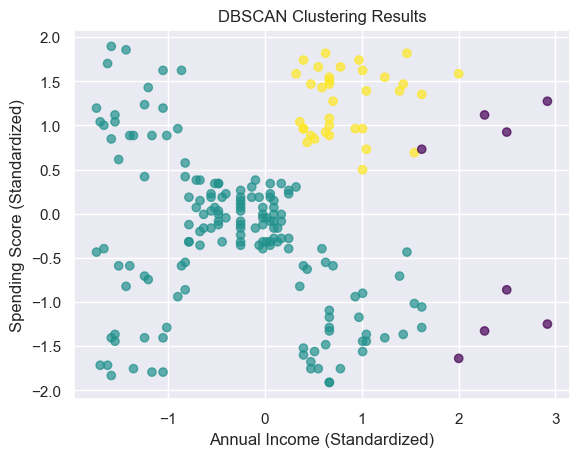

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = labels

# Visualizing clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.title('DBSCAN Clustering Results')
plt.show()

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Selecting relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Filter out noise (-1 labels)
filtered_X = X_scaled[labels != -1]
filtered_labels = labels[labels != -1]

# Compute silhouette score (only if clusters exist)
if len(set(filtered_labels)) > 1:
    score = silhouette_score(filtered_X, filtered_labels)
    print(f"Silhouette Score: {score:.4f}")
else:
    print("Silhouette Score could not be calculated due to insufficient clusters.")

Silhouette Score: 0.3876


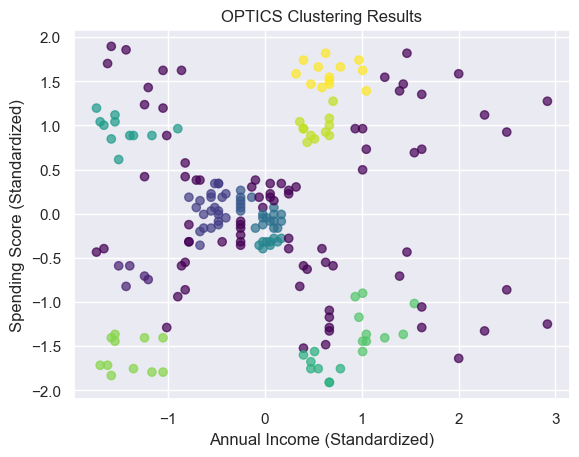

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply OPTICS
optics = OPTICS(min_samples=5, eps=2.0)
labels = optics.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = labels

# Visualizing clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.title('OPTICS Clustering Results')
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Selecting relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply OPTICS clustering
optics = OPTICS(min_samples=5, metric='euclidean')
labels = optics.fit_predict(X_scaled)

# Filter out noise (-1 labels)
filtered_X = X_scaled[labels != -1]
filtered_labels = labels[labels != -1]

# Compute silhouette score (only if clusters exist)
if len(set(filtered_labels)) > 1:
    score = silhouette_score(filtered_X, filtered_labels)
    print(f"Silhouette Score: {score:.4f}")
else:
    print("Silhouette Score could not be calculated due to insufficient clusters.")

Silhouette Score: 0.5245


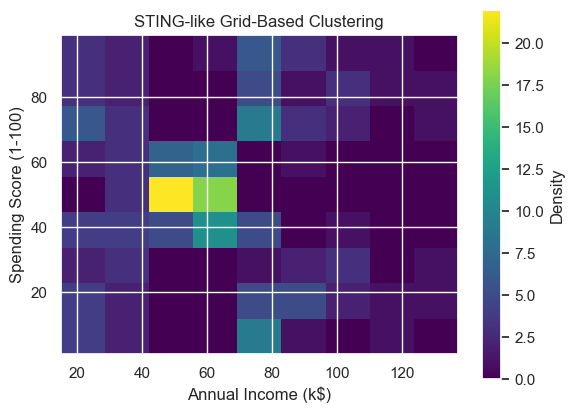

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Define grid resolution
x_bins = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)  # 10 bins for Annual Income
y_bins = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)  # 10 bins for Spending Score

# Compute statistical aggregation (mean in each grid cell)
grid_stat, x_edges, y_edges, bin_numbers = binned_statistic_2d(
    X[:, 0], X[:, 1], None, statistic='count', bins=[x_bins, y_bins]
)

# Visualizing the grid-based density distribution
plt.imshow(grid_stat.T, origin='lower', cmap='viridis', extent=[
    X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()
])
plt.colorbar(label='Density')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('STING-like Grid-Based Clustering')
plt.show()

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Selecting relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define grid parameters
grid_size = 10  # Adjust grid size based on dataset characteristics
x_bins = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), grid_size)
y_bins = np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), grid_size)

# Assign data points to grid cells
grid_labels = np.zeros(X_scaled.shape[0])
for i in range(X_scaled.shape[0]):
    x_bin = np.digitize(X_scaled[i, 0], x_bins) - 1
    y_bin = np.digitize(X_scaled[i, 1], y_bins) - 1
    grid_labels[i] = x_bin * grid_size + y_bin  # Unique identifier for grid cell

# Compute silhouette score (if clusters exist)
if len(set(grid_labels)) > 1:
    score = silhouette_score(X_scaled, grid_labels)
    print(f"Silhouette Score: {score:.4f}")
else:
    print("Silhouette Score could not be calculated due to insufficient clusters.")

Silhouette Score: 0.2732


Suitable Algorithm for Best accuracy:-
(silhoutte Scores for each Algorithms)
# K-mean: 0.55
# Agglomerative clustering: 0.5538
# Divisive Hierarchical Clustering: 0.49
# GaussianMixture: 0.3647
# Spectral Clustering: 0.5447
# DBSCAN Clustering: 0.3876
# OPTICS Clustering: 0.5245
# STING-like Grid-Based Clustering: 0.2732

Conclusion:
Based on the silhouette scores of different clustering algorithms, Agglomerative Clustering (0.5538) emerges as the best-performing approach for segmenting of the dataset, closely followed by K-Means (0.55). These methods provide well-defined clusters with high separation quality.
Other methods like Spectral Clustering (0.5447) and OPTICS (0.5245) also show competitive performance, whereas Divisive Hierarchical Clustering (0.49) and DBSCAN (0.3876) are less effective,  due to their sensitivity to density-based structures or parameter tuning. STING-like Grid-Based Clustering (0.2732) has the lowest silhouette score, indicating poor cluster separation.

Agglomerative Clustering  is the best-performing method, closely followed by K-Means. 

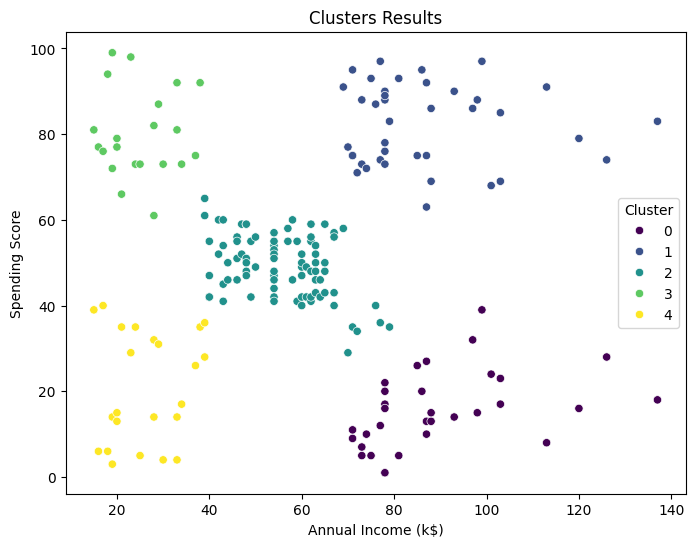

In [5]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Selecting relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Generate the hierarchical linkage matrix
linkage_matrix = sch.linkage(X_scaled, method='ward')

n_clusters = 5  
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df['Cluster'] = model.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Clusters Results")
plt.legend(title="Cluster")
plt.show()

(Cluster Interpretations and Business Strategies):-

(Blue) High Income, High Spending (Luxury Shoppers)
•	These individuals earn a high income and spend generously.
•	Likely loyal to premium brands, preferring high-end products and services.
•	Businesses may target them with exclusive deals or luxury offerings.

(Purple)High Income, Low Spending (Cautious Earners)
•	Despite earning well, they spend conservatively.
•	Could be financially cautious or prioritize savings over lifestyle expenses.
•	Businesses may entice them with value-based marketing strategies.

(Green) Low Income, High Spending (Impulse Buyers)
•	Spending more than expected given their income level.
•	Could be aspirational buyers, purchasing branded goods despite lower earnings.
•	Businesses may offer them budget-friendly alternatives or installment-based plans.

(Yellow) Low Income, Low Spending (Budget-Conscious Consumers)
•	These individuals spend cautiously within their limited income range.
•	Likely prioritize essential purchases over luxury spending.
•	Businesses may focus on discounts, promotions, or basic necessity-driven marketing.
S
(teal)Moderate Income, Moderate Spending (Balanced Consumers)
•	Exhibit a stable income-to-spending ratio, making predictable purchases.
•	They might represent the majority of a customer base, ensuring consistent business revenue.
•	Businesses can offer mainstream products and personalized recommendations to retain them.
